# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [85]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### Questions 1 and 2 : Validity of CLT

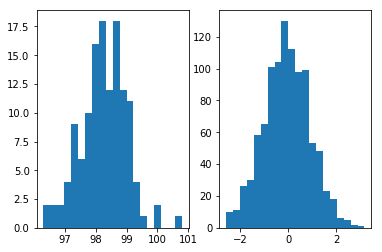

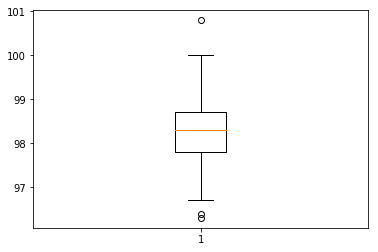

In [186]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(23)

plt.subplot(1,2,1)
plt.hist(df['temperature'], bins=20)
plt.subplot(1,2,2)
plt.hist(np.random.normal(0,1,1000), bins=20)
plt.show()
plt.boxplot(df['temperature'])
plt.show()

It looks like it is approximately normal based on the histogram comparing a normal distribution and on the boxplot. With the sample size > 30 we can assume normality as well. Additionally, the observations can be considered independent bacause the size of the sample (len(df) = 130) is < 10% of the population.

### Question 3: Bootstrap Hypothesis Testing
Null Hypothesis: The mean body temperature of the sample = 98.6

Alternate hypothesis: The mean body temperature of the sample != 98.6

In [142]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates   

def diff_from_mean(data):
    return np.mean(data)-98.6

mean_shifted = df.temperature - df.temperature.mean() + 98.6
diff_obs = diff_from_mean(df.temperature)  #-0.351
#Get 1000 replicates
bs_replicates = draw_bs_reps(mean_shifted, diff_from_mean, 10000)
p_value = np.sum(bs_replicates <= diff_obs)/len(bs_replicates) # 0.0000
p_value

0.0

The p value is 0, we never get a result as extreme as the one observed, so we reject the null, the mean body temp is not 98.6.

### Question 3: Frequentist Statistical Approach
I will use a one-sample test because we are only testing one sample mean.
Since the sample size is over 30, we can use either the z test or the t test, but we don't know the population standard deviation, so well use the t test originally.
When the degrees of freedom > 30 the t test and z test are nearly identical. 

t = (sample mean - mu) / (sigma / sqrt(n))

z = (sample mean - mu) / (sigma / sqrt(n))

In [175]:
t = (df.temperature.mean() - 98.6)/(df.temperature.std()/np.sqrt(len(df.temperature))) # -5.455
z = (df.temperature.mean() - 98.6)/(df.temperature.std()/np.sqrt(len(df.temperature))) # -5.455
t, z

(-5.4548232923640789, -5.4548232923640789)

For a t score of -5.455 with 129 degrees of freedom, the p value is < 0.0001

For a z score of -5.455, the p value is < 0.0001 

In both cases we reject the null. Additionally, the z test and t test are the same because the sample size is > 30 

### Quesiton 4: Small Sample Size


In [174]:
small_sample = np.random.choice(df.temperature, 10)
t = (small_sample.mean() - 98.6)/(small_sample.std()/np.sqrt(len(small_sample))) # -2.835
z = (small_sample.mean() - 98.6)/(small_sample.std()/np.sqrt(len(small_sample))) # -2.835
t, z

(-2.8347335475693254, -2.8347335475693254)

The t test is the correct statistic to use when the sample size is < 30.

For a t score of -2.835 with 9 degrees of freedom, the p value is 0.0196

For a z score of -2.835, the p value is 0.0046

The t score p value is higher, indicating that the spread of the t distribution at df = 9 is wider than that of the z test, lowering the significance of the findings of the data. This makes sense because with less data the conclusion should not be as significant. At both levels we would reject the null with alpha=.05. This tells us that with less data the t score will give us a higher p level, thus making the probability of getting a significant difference being lower. As a result, the t score p level is a more conservative estimate that is more likely to be right when it does lead us to rejecting a given null hypothesis.

### Question 5:
We are going to decide that someone's temperature is abnormal if it is outside of the 95% confidence interval with alpha = .05 

Using Bootstrapping:

In [176]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)

conf_int_bs = np.percentile(bs_replicates, [2.5,97.5])
conf_int_bs

array([ 98.12307692,  98.37538462])

Using bootstrapping, if the temperatures is below 98.12 or greater than 98.37, it is outside the 95% confidence interval and will be considered abnormal.

### Frequentist Approach

In [177]:
me = 1.96*df.temperature.std()/np.sqrt(len(df.temperature)) # margin of error is .126
conf_int_fre = ((df.temperature.mean()-me),(df.temperature.mean()+me)) # 95% conf interval is (98.123, 98.375)
conf_int_fre

(98.123194112228518, 98.375267426233037)

Using a frequintist approach, if the temperatures is below 98.12 or greater than 98.38, it is outside the 95% confidence interval and will be considered abnormal.

### Question 6: Male and Female Temperature Difference
I will use a frequintist two sample approach because we are sampling two means, one for male, one for female.

Null Hypothesis: male sample mean = female sample mean

Alternate Hypothesis: male sample mean != female sample mean

alpha=.05


In [179]:
male = df[df.gender=='M']
female = df[df.gender=='F']

We will use a t test because the population standard deviation is not known. Since both the male and female sample sizes are greater than 30 though, it will be the identical to the z test. 

T score = (female mean - male mean)/sqrt((male variance/ male sample size) + (female variance/female sample size))

In [181]:
gender_diff = male.temperature.mean()-female.temperature.mean() # -.289
t = gender_diff / (np.sqrt(male.temperature.var()/len(male.temperature)+female.temperature.var()/len(female.temperature)))
t


-2.2854345381652741

For a t score of -2.285, the p value is .0223, which is below alpha, therefore we reject the null hypothesis that the mean temperature difference for males and females are the same. Females do seem to have a higher mean temperature.

### Conclusion

After the statistical analysis, it seems as though the mean body temperature is not 98.6, and that females seem to have a different body temperature than males.